In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거
warnings.filterwarnings("ignore", message="Could not find the number of physical cores")

# ! pip install openpyxl
# ! pip install statsmodels


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# plt.rcParams['font.family'] ='Malgun Gothic'
# plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'  # 또는 'NanumGothic' (설치된 경우)
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 깨짐 방지

## ws_3_1

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# 1. 정규분포 데이터 생성
# - 평균(mu): 50
# - 표준편차(sigma): 10
# - 데이터 개수(size): 1000개
# - numpy의 random.normal(평균, 표준편차, 데이터 개수) 
#   정규분포 함수를 사용하여 데이터를 생성하세요.

mu, sigma, size = 50, 10, 1000
data = np.random.normal(mu, sigma, size)  # 빈칸을 채워 정규분포 데이터 생성
data

array([54.94237066, 61.44270544, 60.18387656, 37.5379885 , 51.01680861,
       52.75197345, 52.45878142, 44.84600925, 47.68706685, 59.19616412,
       55.63436499, 52.55445173, 42.63552074, 42.51597566, 51.93410648,
       49.84578379, 52.78748238, 66.42843441, 40.61349708, 39.05284799,
       54.39895039, 40.56079109, 42.02596544, 42.26062521, 48.97581842,
       58.27173103, 53.54386089, 52.79834681, 56.36624473, 59.82245017,
       46.66057306, 48.97780908, 47.94522869, 45.85431102, 56.59800335,
       74.30414106, 41.07425173, 54.28498844, 53.11222779, 56.42643235,
       46.95934151, 54.52557855, 58.43887492, 41.30039355, 73.79496828,
       68.64123585, 34.34321544, 57.65015385, 62.70861301, 43.6049063 ,
       44.24948387, 66.81957221, 44.23921886, 56.61241492, 39.88907594,
       51.72682957, 52.14945383, 47.18723742, 44.32317395, 60.22683975,
       56.30554249, 46.74109697, 53.71115197, 44.78184402, 55.29762117,
       50.75832079, 49.3168776 , 63.06139381, 43.06571361, 34.22

In [4]:
# 2. 데이터를 DataFrame으로 변환
# - pandas의 DataFrame()을 사용하여 데이터를 저장하세요.
df = pd.DataFrame({"value": data})  # 빈칸을 채워 데이터프레임 생성
df

,value
0,54.942371
1,61.442705
2,60.183877
3,37.537989
4,51.016809
...,...
995,51.368097
996,61.937150
997,65.382135
998,62.498979


In [5]:
# 3. 전체 데이터의 기본 통계량 확인
# - describe() 함수를 사용하여 평균, 표준편차, 최소값, 최대값 등의 통계를 확인하세요.
summary_stats = df["value"].describe()  # 빈칸을 채워 describe() 함수 호출
summary_stats


count    1000.000000
mean       49.328802
std         9.882579
min        22.977399
25%        43.086894
50%        49.329266
75%        56.055679
max        75.044256
Name: value, dtype: float64

In [6]:
# 4. 정규분포의 이론적 기대값과 비교
# - 정규분포는 평균(mu)과 표준편차(sigma)를 기준으로 데이터가 분포함
# - 68-95-99.7 법칙을 적용하여 실제 데이터가 정규분포와 얼마나 유사한지 확인

# 평균과 표준편차 계산
# - 데이터의 평균과 표준편차를 계산하세요.
mean_value = df["value"].mean()  # 빈칸을 채워 평균 계산
std_value = df["value"].std()  # 빈칸을 채워 표준편차 계산

# 68-95-99.7 법칙 적용
# - 정규분포에서는 평균을 기준으로 데이터가 특정 범위 내에 포함되는 비율이 정해져 있음
# - 평균(mu) ±1 표준편차(sigma) 내에 약 68%의 데이터가 존재해야 함
# - 평균 ±2 표준편차 내에 약 95%의 데이터가 존재해야 함
# - 평균 ±3 표준편차 내에 약 99.7%의 데이터가 존재해야 함

within_1_sigma = np.sum((df["value"] >= mu - sigma) & (df["value"] <= mu + sigma)) / size * 100  # ±1 표준편차
within_2_sigma = np.sum((df["value"] >= mu - 2*sigma) & (df["value"] <= mu + 2*sigma)) / size * 100  # ±2 표준편차
within_3_sigma = np.sum((df["value"] >= mu - 3*sigma) & (df["value"] <= mu + 3*sigma)) / size * 100  # ±3 표준편차

print(within_1_sigma)
print(within_2_sigma)
print(within_3_sigma)

67.7
95.3
100.0


0.03989422804014327


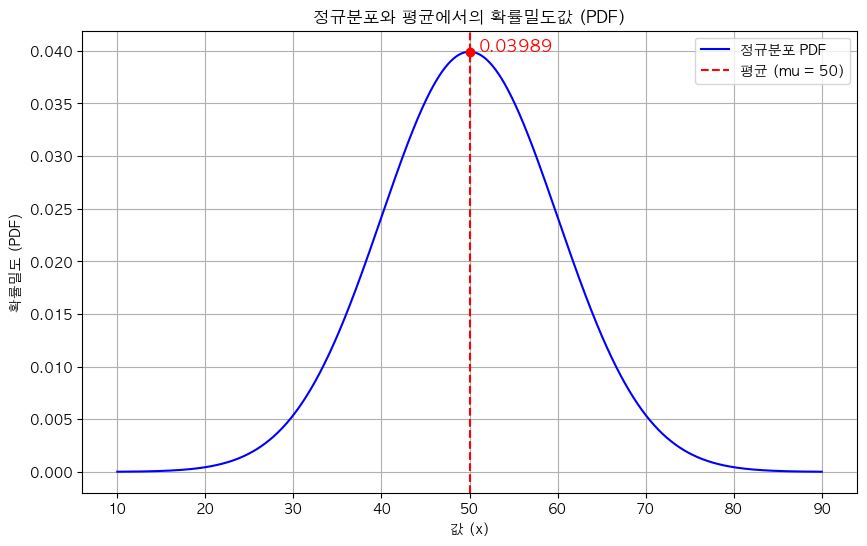

In [7]:
# 5. 정규분포 검정 수행
# - 평균과 표준편차가 정규분포의 이론적인 값과 얼마나 유사한지 확인
# - 특정 값(예: 평균)에서의 확률밀도함수(PDF) 값을 계산하여 정규성을 검토
# - pdf(확률변수값, 평균, 표준편차) => 확률변수값에 대한 정규확률밀도값

sample_value = mu  # 빈칸을 채워 특정 값을 설정
pdf_value = norm.pdf(sample_value, loc=mu, scale=sigma)  # 빈칸을 채워 PDF 계산
print(pdf_value)

# 0.03989는 “정규분포의 평균 위치(mu)에서의 밀도(y값)“이고, 
# 이는 곡선에서 데이터가 가장 몰려 있는 지점의 높이를 의미합니다. 
# 이 값 자체는 확률이 아니라 ‘얼마나 밀집돼 있는지’를 보여주는 값이에요.

# x축 범위 설정: 평균을 중심으로 넓게 보기
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# 정규분포의 확률밀도함수(PDF) 계산
pdf = norm.pdf(x, loc=mu, scale=sigma)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='정규분포 PDF', color='blue')
plt.axvline(mu, color='red', linestyle='--', label=f'평균 (mu = {mu})')
plt.scatter(mu, pdf_value, color='red', zorder=5)
plt.text(mu + 1, pdf_value, f'{pdf_value:.5f}', color='red', fontsize=12)

plt.title('정규분포와 평균에서의 확률밀도값 (PDF)')
plt.xlabel('값 (x)')
plt.ylabel('확률밀도 (PDF)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# 6. 결과 출력 및 해석
# - 생성된 데이터가 평균 50, 표준편차 10을 따르는 정규분포에 가깝다는 것을 확인
# - 68-95-99.7 법칙을 적용한 결과, 실제 데이터가 이론적 정규분포와 유사한 분포를 보임
# - 샘플 데이터의 평균과 표준편차가 정규분포의 이론적 값과 거의 동일함
# - 추가적인 정규성 검정(예: QQ-Plot, 샤피로-윌크 검정 등)을 수행하면 보다 정확한 분석이 가능함

print("전체 데이터의 기본 통계량")
print(summary_stats)

print("\n68-95-99.7 법칙 적용 결과")
print(f"68% 범위 내 데이터 비율: {within_1_sigma:.2f}%")
print(f"95% 범위 내 데이터 비율: {within_2_sigma:.2f}%")
print(f"99.7% 범위 내 데이터 비율: {within_3_sigma:.2f}%")

print("\n정규분포 검정 결과")
print(f"샘플 평균: {mean_value:.2f}, 샘플 표준편차: {std_value:.2f}")
print(f"이론적 정규분포의 평균: {mu}, 표준편차: {sigma}")
print(f"평균 값({sample_value})에서의 이론적 확률밀도함수(PDF) 값: {pdf_value:.6f}")


전체 데이터의 기본 통계량
count    1000.000000
mean       49.328802
std         9.882579
min        22.977399
25%        43.086894
50%        49.329266
75%        56.055679
max        75.044256
Name: value, dtype: float64

68-95-99.7 법칙 적용 결과
68% 범위 내 데이터 비율: 67.70%
95% 범위 내 데이터 비율: 95.30%
99.7% 범위 내 데이터 비율: 100.00%

정규분포 검정 결과
샘플 평균: 49.33, 샘플 표준편차: 9.88
이론적 정규분포의 평균: 50, 표준편차: 10
평균 값(50)에서의 이론적 확률밀도함수(PDF) 값: 0.039894


## ws_3_2

In [9]:
# 필요한 라이브러리 불러오기
import pandas as pd

# 1. CSV 파일을 불러와 데이터프레임으로 저장
# - pandas의 read_csv() 함수를 사용하여 데이터를 불러오세요.
file_path = "data/sample_data.csv"
df = pd.read_csv(file_path)
df

,column_name,other_column_name
0,52,37.847975
1,93,98.954011
2,15,-5.791277
3,72,71.785250
4,61,54.829096
...,...,...
995,42,45.034448
996,41,48.342609
997,6,-3.933782
998,52,51.800246


In [10]:
# 2. 데이터 정보 확인 (컬럼, 데이터 타입, 결측치 여부 등)
# - info() 함수를 사용하여 데이터의 구조를 확인하세요.
# - df.info()는 반환값이 None이기 때문에
# - 변수에 저장해서 사용할 수 없다.
# - 고로, 결과값은 df.info()가 한번
#   print(df_info)가 한번 실행되어
#   info 값과 None이 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   column_name        1000 non-null   int64  
 1   other_column_name  1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [11]:
# 3. 기본 통계량 확인
# - describe() 함수를 사용하여 데이터의 평균, 표준편차, 최소/최대값을 확인하세요.
summary_stats = df.describe()
summary_stats

,column_name,other_column_name
count,1000.000000,1000.000000
mean,49.560000,50.321447
std,29.287679,31.288151
min,1.000000,-19.155994
25%,24.000000,25.246078
50%,50.000000,50.325105
75%,75.000000,76.462954
max,99.000000,120.133939


In [12]:
# 4. 특정 조건을 만족하는 데이터 필터링
# - column_name이 50 이상인 데이터만 필터링하여 새로운 데이터프레임(filtered_df)에 저장하세요.
filtered_df = df[df["column_name"] >= 50]
filtered_df

,column_name,other_column_name
0,52,37.847975
1,93,98.954011
3,72,71.785250
4,61,54.829096
6,83,94.888010
...,...,...
986,68,63.418630
988,67,63.060186
990,86,71.554426
994,83,77.623103


In [13]:
# - other_column_name이 0보다 큰 데이터만 필터링하여 새로운 데이터프레임(positive_df)에 저장하세요.
positive_df = df[df["other_column_name"] > 0]
positive_df

,column_name,other_column_name
0,52,37.847975
1,93,98.954011
3,72,71.785250
4,61,54.829096
5,21,8.411580
...,...,...
994,83,77.623103
995,42,45.034448
996,41,48.342609
998,52,51.800246


In [14]:
# 5. 두 개의 필터링 조건을 모두 만족하는 데이터 추출
# - column_name이 50 이상이고, other_column_name이 0보다 큰 데이터를 필터링하세요.
filtered_combined = df[(df["column_name"] >= 50) & (df["other_column_name"] > 0)]
filtered_combined

,column_name,other_column_name
0,52,37.847975
1,93,98.954011
3,72,71.785250
4,61,54.829096
6,83,94.888010
...,...,...
986,68,63.418630
988,67,63.060186
990,86,71.554426
994,83,77.623103


In [15]:
# 6. 두 컬럼 간 관계 분석을 위해 상관계수 계산
# - corr() 함수를 사용하여 column_name과 other_column_name 간의 상관계수를 계산하세요.
correlation = df[['column_name','other_column_name']].corr()
correlation

,column_name,other_column_name
column_name,1.00000,0.94231
other_column_name,0.94231,1.00000


In [16]:
# 7. 결과 출력
print("📊 데이터 정보:")
print(df.info())  # 데이터 구조, 컬럼명, 데이터 타입, 결측치 여부 확인

print("\n📊 전체 데이터의 기본 통계량:")
print(summary_stats)  # 평균, 표준편차, 최소값, 최대값 확인

print("\n📊 column_name이 50 이상인 데이터 개수:", len(filtered_df))
# 결과 해석:
# - 전체 데이터 1000개 중에서 column_name이 50 이상인 데이터 개수를 출력하세요.

print("\n📊 other_column_name이 0보다 큰 데이터 개수:", len(positive_df))
# 결과 해석:
# - 전체 데이터 중에서 other_column_name이 0보다 큰 데이터 개수를 출력하세요.

print("\n📊 두 개의 조건(column_name >= 50 & other_column_name > 0)을 만족하는 데이터 개수:", len(filtered_combined))
# 결과 해석:
# - 두 조건을 동시에 만족하는 데이터 개수를 출력하세요.

print("\n📊 컬럼 간 상관계수:")
print(correlation)
# 결과 해석:
# - column_name과 other_column_name의 상관계수를 출력하세요.

# 8. 결론 해석
# - 특정 조건(column_name >= 50, other_column_name > 0)을 활용하여 데이터를 필터링하는 방법을 학습함.
# - describe() 함수를 사용하여 데이터의 분포 및 통계를 확인함.
# - 두 개의 컬럼(column_name과 other_column_name) 간의 관계를 분석하여 높은 상관관계(0.94)를 확인함.
# - 데이터 필터링 및 상관관계 분석 기법은 다양한 데이터 분석 프로젝트에서 활용될 수 있음.


📊 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   column_name        1000 non-null   int64  
 1   other_column_name  1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB
None

📊 전체 데이터의 기본 통계량:
       column_name  other_column_name
count  1000.000000        1000.000000
mean     49.560000          50.321447
std      29.287679          31.288151
min       1.000000         -19.155994
25%      24.000000          25.246078
50%      50.000000          50.325105
75%      75.000000          76.462954
max      99.000000         120.133939

📊 column_name이 50 이상인 데이터 개수: 505

📊 other_column_name이 0보다 큰 데이터 개수: 955

📊 두 개의 조건(column_name >= 50 & other_column_name > 0)을 만족하는 데이터 개수: 505

📊 컬럼 간 상관계수:
                   column_name  other_column_name
column_name            1.00000            0.94231
other_column_na

## ws_3_3

In [17]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 폰트 패밀리를 AppleGothic으로 변경
plt.rcParams['font.family'] = 'AppleGothic'
# 음수(-) 기호가 깨지지 않도록 설정 (필요에 따라)
plt.rcParams['axes.unicode_minus'] = False


# 1. CSV 파일을 불러와 데이터프레임으로 저장
# - pandas의 read_csv() 함수를 사용하여 데이터를 불러오세요.
file_path = "data/statistics_data.csv"
df = pd.read_csv(file_path)
df


,column_1,column_2,column_3,column_4
0,54.967142,36.996777,30,-0.125454
1,48.617357,34.623168,95,0.327880
2,56.476885,30.298152,75,0.085893
3,65.230299,26.765316,99,-2.219300
4,47.658466,33.491117,72,-0.229800
...,...,...,...,...
995,47.188997,35.350751,25,-0.533600
996,67.976865,29.867394,55,1.220821
997,56.408429,25.590627,46,-0.876774
998,44.288210,29.184665,32,1.712040


In [18]:
# 2. 데이터 정보 확인 (컬럼명, 데이터 타입, 결측치 여부 등)
# - info() 함수를 사용하여 데이터의 구조를 확인하세요.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   column_1  1000 non-null   float64
 1   column_2  1000 non-null   float64
 2   column_3  1000 non-null   int64  
 3   column_4  1000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [19]:
# 3. 박스플롯을 위한 확장된 통계 분석 수행
# - 데이터의 이상치 탐색과 함께, 각 컬럼의 변동성 및 중심 경향성을 확인합니다.

# 분석할 컬럼 리스트 생성
columns_to_analyze = df.columns
columns_to_analyze

Index(['column_1', 'column_2', 'column_3', 'column_4'], dtype='object')

In [20]:
# 4. 각 컬럼별 사분위수(Quartiles), IQR 및 이상치 분석

# 결과 저장용 딕셔너리 생성
boxplot_stats = {}

for column in columns_to_analyze:
    # Q1 (제1사분위수, 25%)
    Q1 = df[column].quantile(.25)
    
    # Q2 (중앙값, 50%)
    Q2 = df[column].median()
    
    # Q3 (제3사분위수, 75%)
    Q3 = df[column].quantile(.75)
    
    # IQR (사분위 범위, Interquartile Range)
    IQR = Q3 - Q1
    
    # 이상치 탐색 기준 (1.5 * IQR 및 3.0 * IQR 기준 적용)
    lower_bound_1_5 = Q1 - 1.5 * IQR  # 일반 이상치 하한
    upper_bound_1_5 = Q3 + 1.5 * IQR  # 일반 이상치 상한
    
    lower_bound_3_0 = Q1 - 3.0 * IQR  # 극단 이상치 하한
    upper_bound_3_0 = Q3 + 3.0 * IQR  # 극단 이상치 상한
    
    # 일반 이상치 개수 (1.5 * IQR 기준)
    mild_outliers = df[(df[column] < lower_bound_1_5) | (df[column] > upper_bound_1_5)]
    
    # 극단적 이상치 개수 (3.0 * IQR 기준)
    extreme_outliers = df[(df[column] < lower_bound_3_0) | (df[column] > upper_bound_3_0)]
    
    # 컬럼별 분석 결과 저장
    boxplot_stats[column] = {
        "Q1": Q1,
        "Q2 (Median)": Q2,
        "Q3": Q3,
        "IQR": IQR,
        "Lower Bound (1.5 * IQR)": lower_bound_1_5,
        "Upper Bound (1.5 * IQR)": upper_bound_1_5,
        "Lower Bound (3.0 * IQR)": lower_bound_3_0,
        "Upper Bound (3.0 * IQR)": upper_bound_3_0,
        "Mild Outliers Count (1.5 * IQR)": len(mild_outliers),
        "Extreme Outliers Count (3.0 * IQR)": len(extreme_outliers),
        "Variance": np.var(df[column]),
        "Standard Deviation": np.std(df[column]),
        "Mean Absolute Deviation": np.mean(np.abs(df[column] - df[column].median()))
    }


In [21]:
# 5. 분석 결과 출력
for column, stats in boxplot_stats.items():
    print(f"\n{column} 컬럼의 박스플롯 통계 및 이상치 분석:")
    print(f"  - 제1사분위수(Q1, 25%): {stats['Q1']:.2f}")
    print(f"  - 중앙값(Q2, 50%): {stats['Q2 (Median)']:.2f}")
    print(f"  - 제3사분위수(Q3, 75%): {stats['Q3']:.2f}")
    print(f"  - IQR (Q3 - Q1): {stats['IQR']:.2f}")
    print(f"  - 일반 이상치 하한 (1.5 * IQR): {stats['Lower Bound (1.5 * IQR)']:.2f}")
    print(f"  - 일반 이상치 상한 (1.5 * IQR): {stats['Upper Bound (1.5 * IQR)']:.2f}")
    print(f"  - 극단 이상치 하한 (3.0 * IQR): {stats['Lower Bound (3.0 * IQR)']:.2f}")
    print(f"  - 극단 이상치 상한 (3.0 * IQR): {stats['Upper Bound (3.0 * IQR)']:.2f}")
    print(f"  - 일반 이상치 개수 (1.5 * IQR 기준): {stats['Mild Outliers Count (1.5 * IQR)']}개")
    print(f"  - 극단 이상치 개수 (3.0 * IQR 기준): {stats['Extreme Outliers Count (3.0 * IQR)']}개")
    print(f"  - 분산 (Variance): {stats['Variance']:.2f}")
    print(f"  - 표준편차 (Standard Deviation): {stats['Standard Deviation']:.2f}")
    print(f"  - 평균 절대 편차 (Mean Absolute Deviation): {stats['Mean Absolute Deviation']:.2f}")



column_1 컬럼의 박스플롯 통계 및 이상치 분석:
  - 제1사분위수(Q1, 25%): 43.52
  - 중앙값(Q2, 50%): 50.25
  - 제3사분위수(Q3, 75%): 56.48
  - IQR (Q3 - Q1): 12.96
  - 일반 이상치 하한 (1.5 * IQR): 24.09
  - 일반 이상치 상한 (1.5 * IQR): 75.91
  - 극단 이상치 하한 (3.0 * IQR): 4.66
  - 극단 이상치 상한 (3.0 * IQR): 95.35
  - 일반 이상치 개수 (1.5 * IQR 기준): 8개
  - 극단 이상치 개수 (3.0 * IQR 기준): 0개
  - 분산 (Variance): 95.79
  - 표준편차 (Standard Deviation): 9.79
  - 평균 절대 편차 (Mean Absolute Deviation): 7.79

column_2 컬럼의 박스플롯 통계 및 이상치 분석:
  - 제1사분위수(Q1, 25%): 26.97
  - 중앙값(Q2, 50%): 30.32
  - 제3사분위수(Q3, 75%): 33.64
  - IQR (Q3 - Q1): 6.68
  - 일반 이상치 하한 (1.5 * IQR): 16.96
  - 일반 이상치 상한 (1.5 * IQR): 43.66
  - 극단 이상치 하한 (3.0 * IQR): 6.94
  - 극단 이상치 상한 (3.0 * IQR): 53.67
  - 일반 이상치 개수 (1.5 * IQR 기준): 8개
  - 극단 이상치 개수 (3.0 * IQR 기준): 0개
  - 분산 (Variance): 24.85
  - 표준편차 (Standard Deviation): 4.98
  - 평균 절대 편차 (Mean Absolute Deviation): 3.95

column_3 컬럼의 박스플롯 통계 및 이상치 분석:
  - 제1사분위수(Q1, 25%): 26.00
  - 중앙값(Q2, 50%): 51.50
  - 제3사분위수(Q3, 75%): 75.00
  - IQR (Q3 - Q

In [22]:
# 6. 데이터 통계 분석 요약
print("\n전체 데이터 기본 통계량:")
df.describe()


전체 데이터 기본 통계량:


,column_1,column_2,column_3,column_4
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.193321,30.354181,50.465000,0.000114
std,9.792159,4.987272,28.144678,1.020034
min,17.587327,15.298057,1.000000,-2.991136
25%,43.524097,26.968792,26.000000,-0.699302
50%,50.253006,30.315386,51.500000,-0.001359
75%,56.479439,33.644411,75.000000,0.668419
max,88.527315,45.965538,99.000000,3.926238


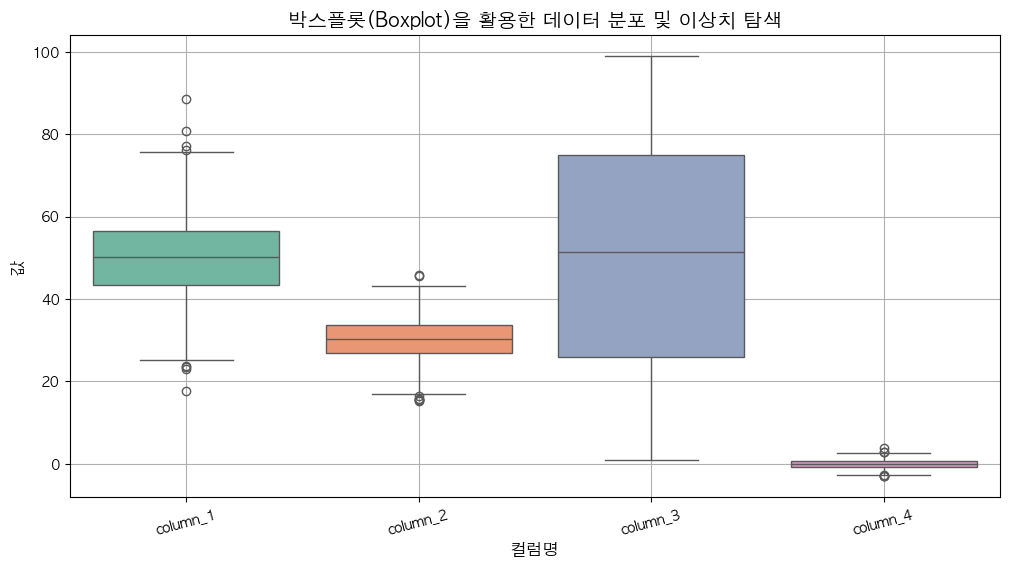

In [23]:
# 7. 박스플롯 시각화
# - 데이터 분포와 이상치를 직관적으로 확인하기 위해 박스플롯을 그립니다.
plt.figure(figsize=(12, 6))  # 그래프 크기 설정
sns.boxplot(data=df, palette="Set2")  # seaborn을 사용하여 박스플롯 그리기
plt.title("박스플롯(Boxplot)을 활용한 데이터 분포 및 이상치 탐색", fontsize=14)
plt.xlabel("컬럼명", fontsize=12)
plt.ylabel("값", fontsize=12)
plt.xticks(rotation=15)  # x축 컬럼명 회전
plt.grid(True)  # 격자 추가
plt.show()


# 8. 결론 해석
# - 박스플롯의 주요 지표(Q1, Q2, Q3, IQR)를 계산하여 데이터의 분포를 확인함.
# - 일반적인 이상치(1.5 * IQR)와 극단적인 이상치(3.0 * IQR)를 구분하여 탐색함.
# - 분산과 표준편차를 확인하여 각 컬럼의 변동성을 비교함.
# - 평균 절대 편차(MAD)는 데이터의 중심값에서 평균적으로 얼마나 벗어나 있는지를 나타내며,
#   표준편차보다 이상치에 덜 민감하므로, 데이터의 변동성을 보완적으로 평가하는 데 유용함.
# - 특정 컬럼에서 이상치 개수가 많다면, 데이터 정제 과정에서 이상치 처리 방법(제거, 변환, 대체 등)을 고려할 필요가 있음.


## ws_3_4

In [24]:
# 필요한 라이브러리 불러오기
import pandas as pd

# 1. CSV 파일을 불러와 데이터프레임으로 저장
# - pandas의 read_csv() 함수를 사용하여 데이터를 불러오세요.
file_path = "data/preprocessing_data.csv"
df = pd.read_csv(file_path)
df

,column_1,column_2,column_3,column_with_missing
0,54.967142,36.996777,30,19.623637
1,48.617357,34.623168,95,20.983639
2,56.476885,30.298152,75,20.257679
3,65.230299,26.765316,99,13.342099
4,47.658466,33.491117,72,NaN
...,...,...,...,...
995,47.188997,35.350751,25,18.399199
996,67.976865,29.867394,55,NaN
997,56.408429,25.590627,46,17.369679
998,44.288210,29.184665,32,25.136121


In [25]:
# 2. 데이터 정보 확인 (컬럼명, 데이터 타입, 결측치 여부 등)
# - info() 함수를 사용하여 데이터의 구조를 확인하세요.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   column_1             1000 non-null   float64
 1   column_2             1000 non-null   float64
 2   column_3             1000 non-null   int64  
 3   column_with_missing  900 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [26]:
# 3. 결측치 확인
# - isnull().sum()을 사용하여 각 컬럼의 결측치 개수를 확인하세요.
missing_values = df.isnull().sum()
missing_values

column_1                 0
column_2                 0
column_3                 0
column_with_missing    100
dtype: int64

In [27]:
# 4. 결측치 처리
# - 특정 컬럼(column_with_missing)의 결측치를 중앙값(median)으로 대체하세요.
df['column_with_missing'] = df["column_with_missing"].fillna(df["column_with_missing"].median())
missing_values_new = df.isnull().sum()
missing_values_new

column_1               0
column_2               0
column_3               0
column_with_missing    0
dtype: int64

In [28]:
# 5. 파생 변수 생성
# - column_1과 column_2의 평균을 구하여 새로운 컬럼 'column_mean'을 생성하세요.
df["column_mean"] = (df["column_1"] + df["column_2"]) / 2

# - column_3의 값을 기준으로 짝수/홀수를 구분하는 파생 변수 'is_even'을 생성하세요.
df["is_even"] = df["column_3"] % 2 == 0  # True이면 짝수, False이면 홀수

df

,column_1,column_2,column_3,column_with_missing,column_mean,is_even
0,54.967142,36.996777,30,19.623637,45.981959,True
1,48.617357,34.623168,95,20.983639,41.620263,False
2,56.476885,30.298152,75,20.257679,43.387519,False
3,65.230299,26.765316,99,13.342099,45.997807,False
4,47.658466,33.491117,72,20.051030,40.574791,True
...,...,...,...,...,...,...
995,47.188997,35.350751,25,18.399199,41.269874,False
996,67.976865,29.867394,55,20.051030,48.922129,False
997,56.408429,25.590627,46,17.369679,40.999528,True
998,44.288210,29.184665,32,25.136121,36.736438,True


In [29]:
# 6. 결과 출력
print("📊 데이터 정보:")
print(df.info())  # 데이터 구조 출력

print("\n📊 결측치 개수 확인:")
print(df.isnull().sum())  # 컬럼별 결측치 개수 출력

print("\n📊 생성된 파생 변수 샘플 데이터:")
print(df[['column_1', 'column_2', 'column_mean', 'column_3', 'is_even']].head())  # 상위 5개 데이터 출력

# 7. 결론 해석
# - 'column_with_missing' 컬럼의 결측치를 중앙값(median)으로 대체함.
# - column_1과 column_2를 활용하여 'column_mean'이라는 파생 변수를 생성하여 데이터의 평균값을 확인할 수 있도록 함.
# - column_3의 값을 기준으로 짝수/홀수를 구분하는 'is_even' 파생 변수를 추가하여 데이터 그룹을 나눌 수 있도록 함.
# - 이러한 데이터 전처리를 통해 분석에 필요한 새로운 변수들을 추가하여 데이터의 활용성을 높임.


📊 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   column_1             1000 non-null   float64
 1   column_2             1000 non-null   float64
 2   column_3             1000 non-null   int64  
 3   column_with_missing  1000 non-null   float64
 4   column_mean          1000 non-null   float64
 5   is_even              1000 non-null   bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 40.2 KB
None

📊 결측치 개수 확인:
column_1               0
column_2               0
column_3               0
column_with_missing    0
column_mean            0
is_even                0
dtype: int64

📊 생성된 파생 변수 샘플 데이터:
    column_1   column_2  column_mean  column_3  is_even
0  54.967142  36.996777    45.981959        30     True
1  48.617357  34.623168    41.620263        95    False
2  56.476885  30.298152    43.387519        75    Fals

## ws_3_5

In [30]:
# 필요한 라이브러리 불러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 폰트 패밀리를 AppleGothic으로 변경
plt.rcParams['font.family'] = 'AppleGothic'
# 음수(-) 기호가 깨지지 않도록 설정 (필요에 따라)
plt.rcParams['axes.unicode_minus'] = False

# 1. CSV 파일을 불러와 데이터프레임으로 저장
file_path = "data/eda_data.csv"
df = pd.read_csv(file_path)
df

,Date,column_1,column_2,column_3,column_4
0,2023-01-01,104.967142,191.975591,305.875358,396.771337
1,2023-01-02,98.617357,204.481850,270.648817,403.145408
2,2023-01-03,106.476885,200.251848,312.247583,320.071973
3,2023-01-04,115.230299,201.953522,248.922492,436.653107
4,2023-01-05,97.658466,184.539804,330.874669,413.859539
...,...,...,...,...,...
360,2023-12-27,105.193465,196.320333,297.851962,329.569490
361,2023-12-28,115.327389,200.368679,298.883333,430.133665
362,2023-12-29,98.912399,206.951634,321.828886,415.246335
363,2023-12-30,104.017117,189.204806,301.558377,451.590110


In [31]:
print('## Old value ##')
print()
print(df.dtypes)
print()
print(df.isnull().sum())
print()

# 날짜 데이터를 datetime 타입으로 변환하여 시간 데이터로 활용 가능하게 함
df['Date'] = pd.to_datetime(df['Date'])  # 빈칸 채우기

# 결측값 확인 및 처리 (결측값이 있는 경우 평균값으로 대체)
# 평균값으로 결측치를 대체하면 데이터의 왜곡을 최소화할 수 있음
df = df.fillna(df.mean())  # 빈칸 채우기

print('## New Value ##')
print()
print(df.dtypes)
print()
print(df.isnull().sum())

## Old value ##

Date         object
column_1    float64
column_2    float64
column_3    float64
column_4    float64
dtype: object

Date        0
column_1    0
column_2    0
column_3    0
column_4    0
dtype: int64

## New Value ##

Date        datetime64[ns]
column_1           float64
column_2           float64
column_3           float64
column_4           float64
dtype: object

Date        0
column_1    0
column_2    0
column_3    0
column_4    0
dtype: int64


In [32]:
# 이상치 탐지 및 제거 (사분위수 범위를 이용한 IQR 방법 사용)
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(.25)  # 1사분위 값 (Q1) 빈칸 채우기
        Q3 = df[col].quantile(.75)  # 3사분위 값 (Q3) 빈칸 채우기
        IQR = Q3 - Q1  # 사분위 범위 (Interquartile Range, IQR)
        lower_bound = Q1 - 1.5 * IQR  # 이상치 하한값
        upper_bound = Q3 + 1.5 * IQR  # 이상치 상한값
        # 지정된 범위를 벗어난 이상치를 제거
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # 빈칸 채우기
    return df

# 수치형 변수에 대해 이상치 제거 수행
df = remove_outliers(df, ['column_1', 'column_2', 'column_3', 'column_4'])  # 빈칸 채우기

# 데이터의 기초 통계량 확인
# count(개수), mean(평균), std(표준편차), min(최솟값), max(최댓값) 등 제공
descriptive_stats = df.dtypes  # 빈칸 채우기
print("기초 통계량:")
descriptive_stats

기초 통계량:


Date        datetime64[ns]
column_1           float64
column_2           float64
column_3           float64
column_4           float64
dtype: object

In [33]:
# 변수 간의 상관 계수 계산
# 상관 계수는 -1에서 1 사이의 값을 가지며, 
# 1에 가까울수록 강한 양의 상관관계, 
# -1에 가까울수록 강한 음의 상관관계를 의미
correlation_matrix = df.corr()  # 빈칸 채우기
print("\n상관 계수 행렬:")
correlation_matrix


상관 계수 행렬:


,Date,column_1,column_2,column_3,column_4
Date,1.000000,0.084783,-0.023588,0.037085,0.009480
column_1,0.084783,1.000000,-0.075391,0.062603,0.042967
column_2,-0.023588,-0.075391,1.000000,0.094200,0.090470
column_3,0.037085,0.062603,0.094200,1.000000,-0.071123
column_4,0.009480,0.042967,0.090470,-0.071123,1.000000


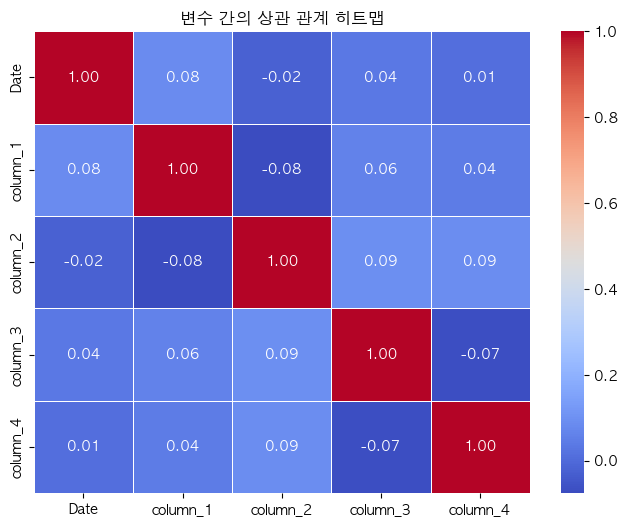

In [34]:
# 상관 계수 행렬을 시각화하여 변수 간의 관계를 쉽게 파악
plt.figure(figsize=(8, 6))  # 히트맵 크기 설정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("변수 간의 상관 관계 히트맵")
plt.show()

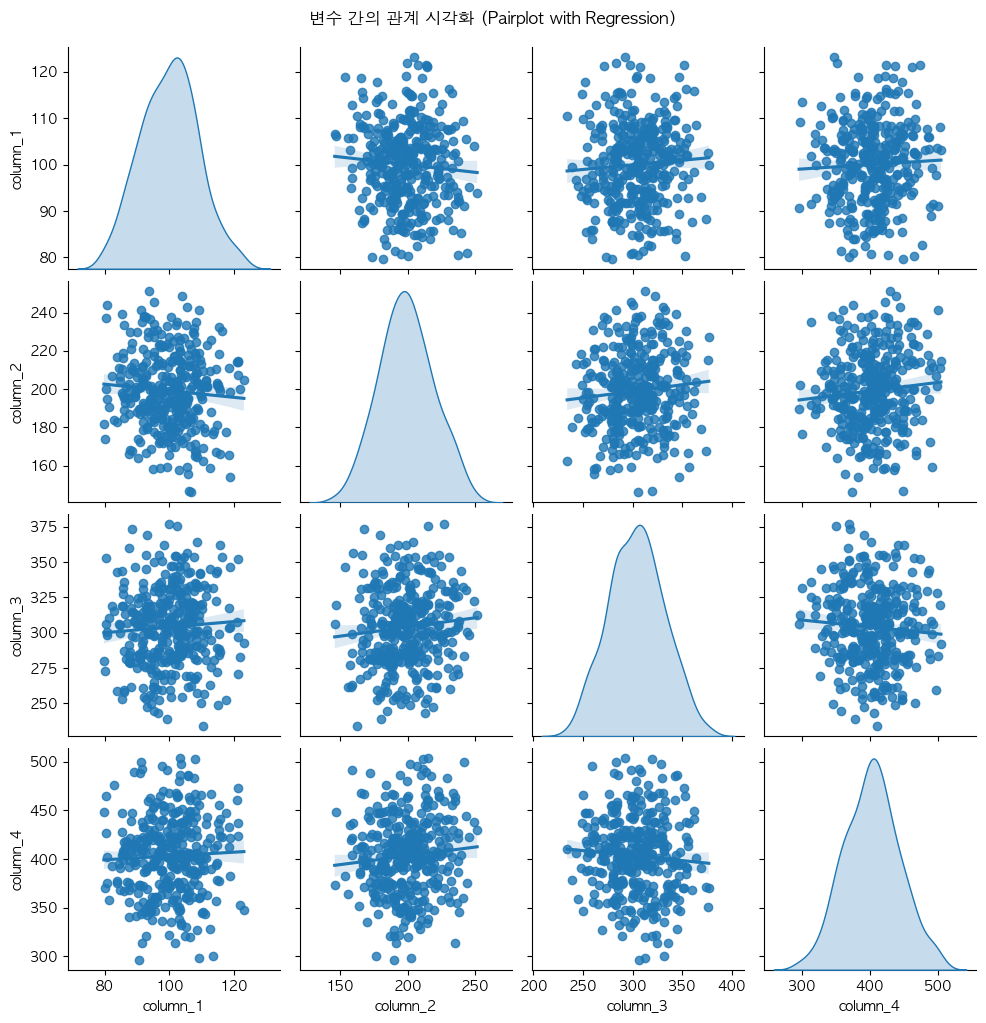

In [35]:
# 변수 간의 관계를 시각화하기 위해 페어플롯(pairplot) 생성
# ============= 페어플롯 ============= 
# 여러 변수 간의 관계를 한 번에 시각적으로 분석하는 데 유용함
# 각 변수 간의 산점도를 그려 관계를 파악할 수 있으며, 대각선에는 각 변수의 분포를 표시함
# kind='reg'를 사용하여 산점도에 선형 회귀선을 추가하여 관계의 방향을 시각적으로 강조
# diag_kind='kde'를 사용하여 대각선의 분포를 커널 밀도 그래프로 표시하여 변수의 분포 형태를 직관적으로 확인
sns.pairplot(df.drop(columns=['Date']), kind='reg', diag_kind='kde')
plt.suptitle("변수 간의 관계 시각화 (Pairplot with Regression)", y=1.02)  # 제목 설정
plt.show()